# **Final Python Notebook 3**
*   Author - C.M.M.S Silva
*   IIT ID - 20230183
*   UoW ID - w2053190
*   Code Peer Reviewer - Pamodi Pansiluni


# Prepared classification data

In [76]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [77]:
#Loading prepared classification data
classification_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/classification_dataset.csv")

In [78]:
# Split features and target
X = classification_data.drop('Mortality_Status', axis=1)
y = classification_data['Mortality_Status']

In [79]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [80]:
# Based on Notebook 1 and Notebook 2 results, using Logistic Regression and Naive bayes for creating a ensemble classifier is better
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=2000, random_state=42)
nb = GaussianNB()

In [81]:
# Drop Patient_ID and index (if it's not set as index)
X_train = X_train.drop(columns=["Patient_ID", "index"], errors='ignore')

# Convert 'Grade' and 'Reginol_Node_Positive' to float (if they are strings)
X_train["Grade"] = X_train["Grade"].astype(float)
X_train["Reginol_Node_Positive"] = X_train["Reginol_Node_Positive"].astype(float)

# Apply one-hot encoding to categorical columns
categorical_cols = ["T_Stage", "N_Stage", "6th_Stage", "Differentiated",
                       "A_Stage", "Estrogen_Status", "Progesterone_Status", "Grade", "Reginol_Node_Positive", "Sex"]
X_train = pd.get_dummies(X_train, columns=categorical_cols)

X_test = pd.get_dummies(X_test, columns=categorical_cols)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [82]:
# Create the ensemble voting classifier based on the probability
ensemble = VotingClassifier(estimators=[('lr', lr), ('nb', nb)], voting='soft')

In [83]:
# Train the ensemble
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=2000,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('nb', GaussianNB())],
                 voting='soft')

In [84]:
# Makeing predictions
y_pred = ensemble.predict(X_test)
y_prob = ensemble.predict_proba(X_test)[:, 1]

In [85]:
# Evaluate ensemble performance
print("--- Ensemble Classifier Results ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Ensemble Classifier Results ---

Confusion Matrix:
[[567 115]
 [ 71  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       682
           1       0.31      0.42      0.36       123

    accuracy                           0.77       805
   macro avg       0.60      0.63      0.61       805
weighted avg       0.80      0.77      0.78       805



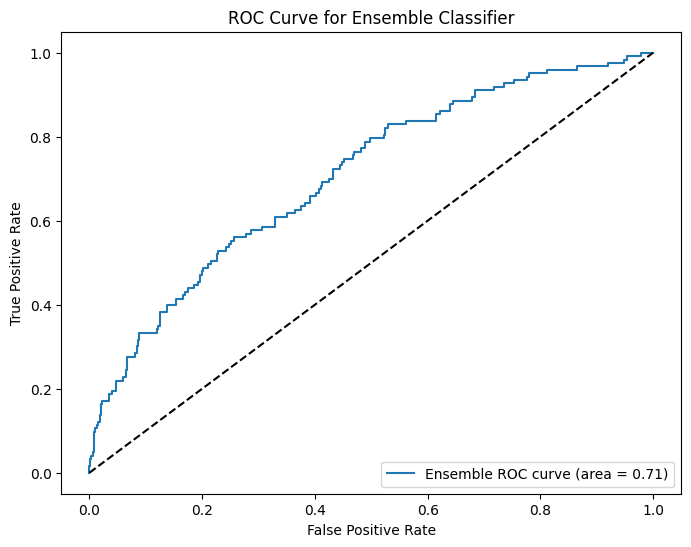

In [86]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Ensemble ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Classifier')
plt.legend(loc='lower right')
plt.show()

# Prepared regression data

In [87]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [89]:
# Loading the prepared regression data
regression_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/regression_dataset.csv")

In [90]:
# Spliting features and target
X = regression_data.drop('Survival_Months', axis=1)
y = regression_data['Survival_Months']

In [91]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
import pandas as pd

# 1. Drop 'Patient_ID' and 'index'
X_train = X_train.drop(columns=["Patient_ID", "index"], errors='ignore')

# 2. Convert numeric-looking string columns to float
X_train["Grade"] = X_train["Grade"].astype(float)
X_train["Reginol_Node_Positive"] = X_train["Reginol_Node_Positive"].astype(float)

# 3. Define categorical columns to encode
categorical_cols = ["Sex", "T_Stage", "N_Stage", "6th_Stage",
                    "Differentiated", "A_Stage",
                    "Estrogen_Status", "Progesterone_Status"]

# 4. One-hot encode those columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)

X_test = X_test.drop(columns=["Patient_ID", "index"], errors='ignore')
X_test["Grade"] = X_test["Grade"].astype(float)
X_test["Reginol_Node_Positive"] = X_test["Reginol_Node_Positive"].astype(float)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [93]:
# Create a fully grown Decision Tree (DT-1)
dt_full = DecisionTreeRegressor(random_state=42)
dt_full.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [94]:
# Create a pruned Decision Tree (DT-2) - limit to 4 levels
dt_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [97]:
# Evaluating both models
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrices
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} Results ---")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")

    return mse, mae, r2

In [98]:
# Evaluate two models
mse_full, mae_full, r2_full = evaluate_regression_model(dt_full, X_train, X_test, y_train, y_test, "Fully Grown Decision Tree (DT-1)")
mse_pruned, mae_pruned, r2_pruned = evaluate_regression_model(dt_pruned, X_train, X_test, y_train, y_test, "Pruned Decision Tree (DT-2)")

--- Fully Grown Decision Tree (DT-1) Results ---
Mean Squared Error: 0.06
Mean Absolute Error: 0.19
R-squared: -0.90
--- Pruned Decision Tree (DT-2) Results ---
Mean Squared Error: 0.03
Mean Absolute Error: 0.14
R-squared: 0.02


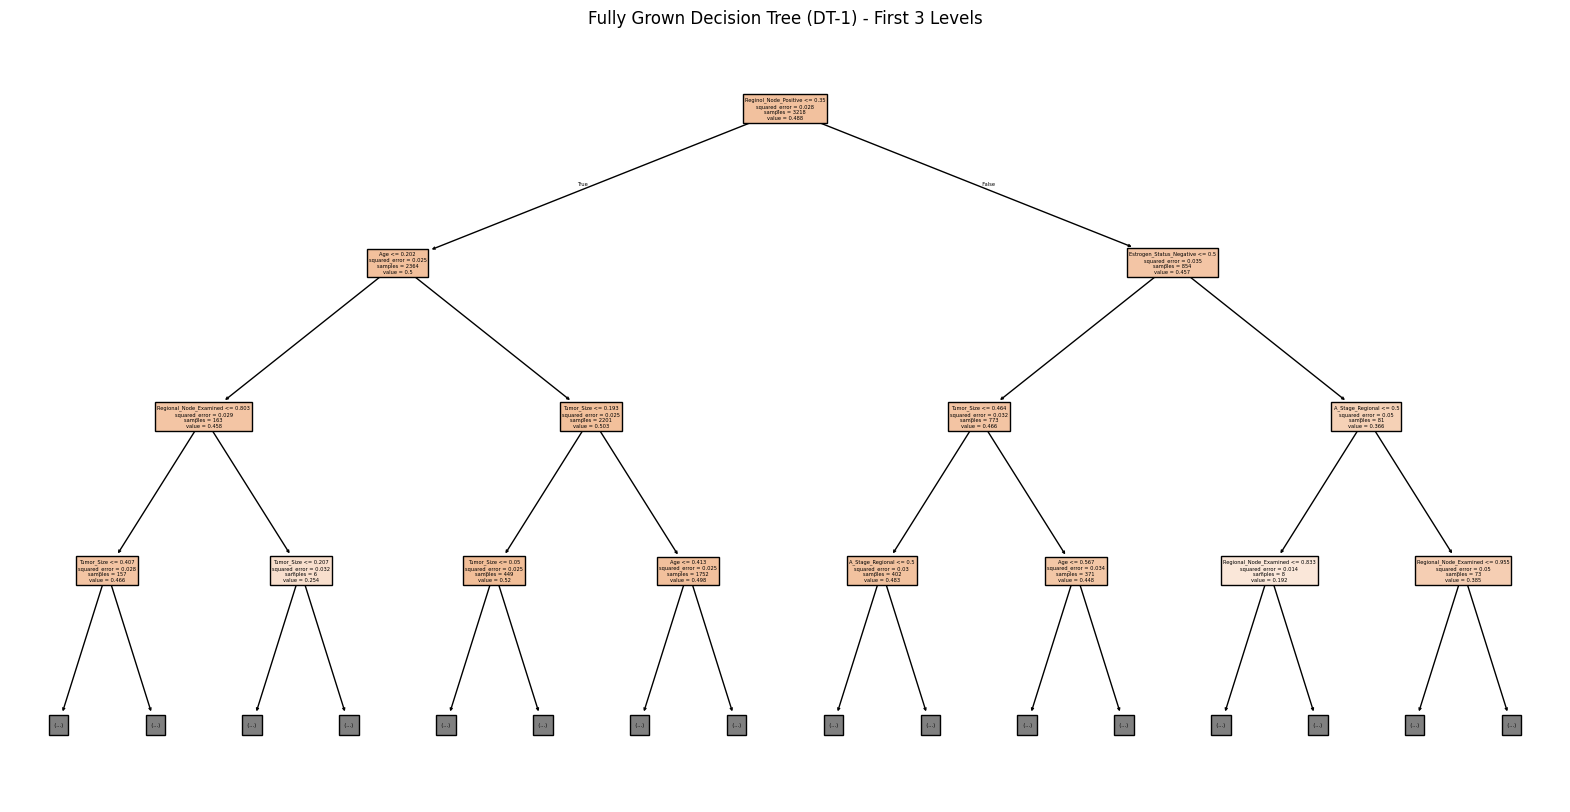

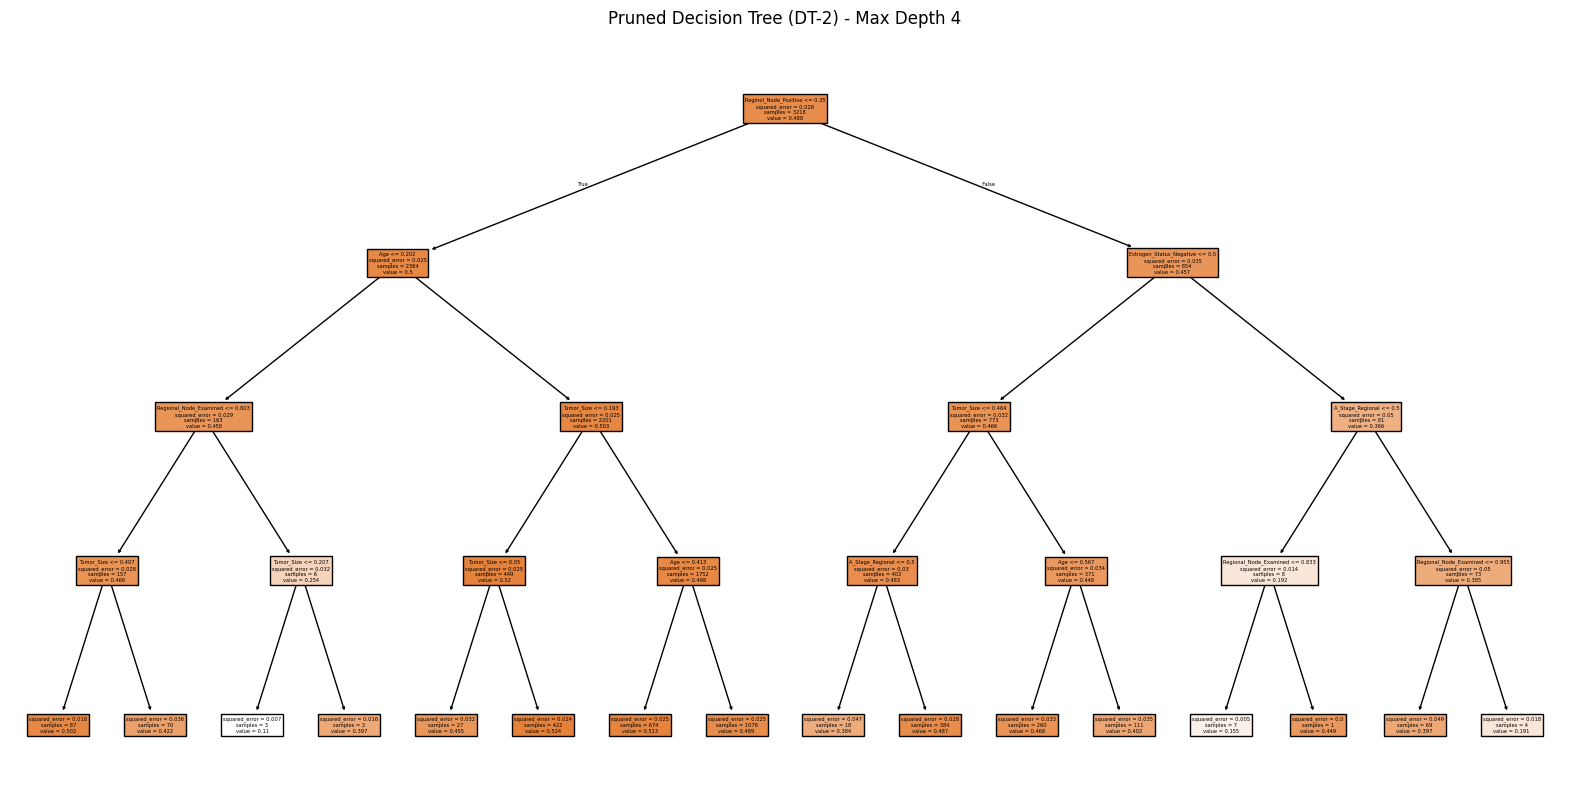

In [99]:
# Visualize the decision trees
# Use the correct DataFrame with aligned features
plt.figure(figsize=(20, 10))
plot_tree(dt_full, filled=True, feature_names=X_train.columns, max_depth=3)
plt.title("Fully Grown Decision Tree (DT-1) - First 3 Levels")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_pruned, filled=True, feature_names=X_train.columns)
plt.title("Pruned Decision Tree (DT-2) - Max Depth 4")
plt.show()

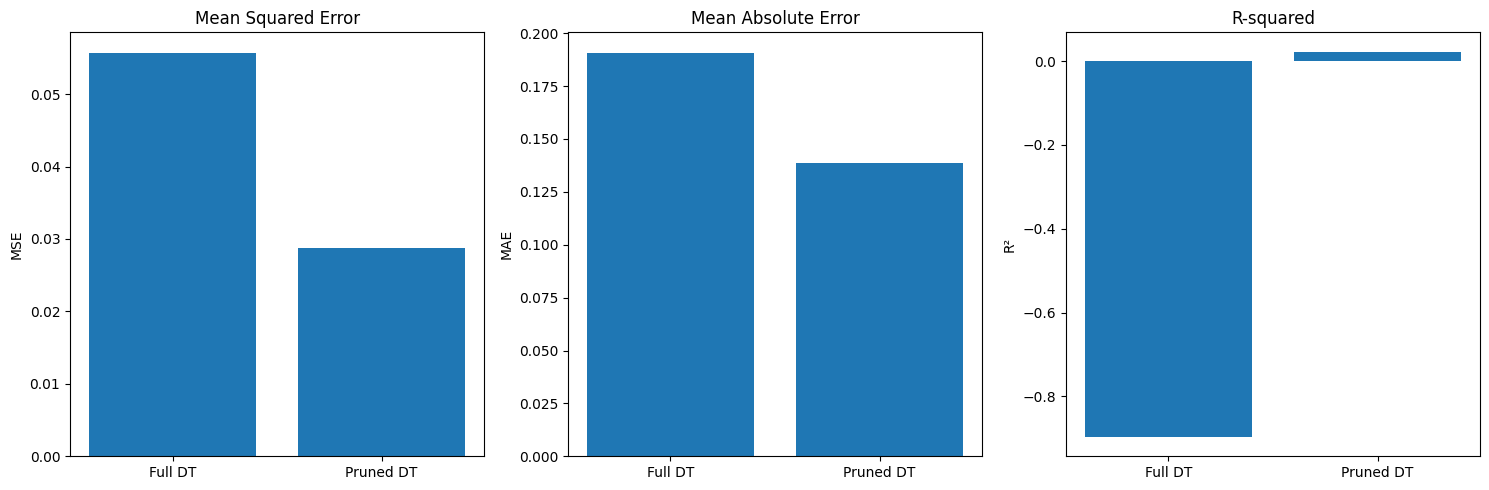

In [100]:
# Compare model performance
models = ["Full DT", "Pruned DT"]
mse_values = [mse_full, mse_pruned]
mae_values = [mae_full, mae_pruned]
r2_values = [r2_full, r2_pruned]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(models, mse_values)
plt.title("Mean Squared Error")
plt.ylabel("MSE")

plt.subplot(1, 3, 2)
plt.bar(models, mae_values)
plt.title("Mean Absolute Error")
plt.ylabel("MAE")

plt.subplot(1, 3, 3)
plt.bar(models, r2_values)
plt.title("R-squared")
plt.ylabel("R²")

plt.tight_layout()
plt.show()